In [1]:
# Cell 1: Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Visual styling
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
print("📧 Messaging System Online. Ready to filter Spam.")

📧 Messaging System Online. Ready to filter Spam.


First 5 Messages:
  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

Spam vs Ham Count:
label
ham     4825
spam     747
Name: count, dtype: int64


/tmp/ipython-input-3300121797.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette='magma')


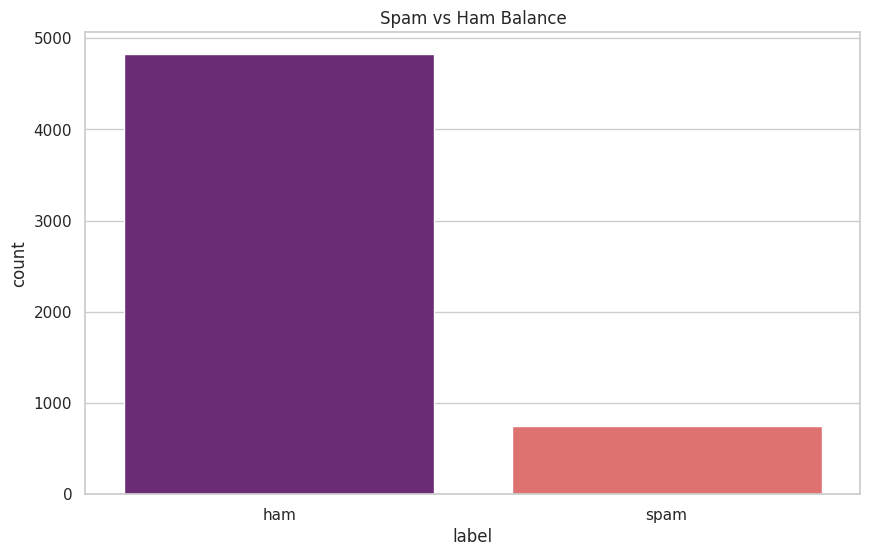

In [2]:
# Cell 2: Load Data
# We use a raw URL to get the tab-separated file (TSV)
url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
cols = ['label', 'message']
df = pd.read_csv(url, sep='\t', names=cols, header=None)

print("First 5 Messages:")
print(df.head())

# Check the balance
print("\nSpam vs Ham Count:")
print(df['label'].value_counts())

# Visualize
sns.countplot(x='label', data=df, palette='magma')
plt.title("Spam vs Ham Balance")
plt.show()

In [3]:
# Cell 3: Convert Text to Numbers (Vectorization)
# 1. Convert labels to numbers (Ham=0, Spam=1)
df['label_num'] = df['label'].map({'ham': 0, 'spam': 1})

# 2. Split X (Message) and y (Label)
X = df['message']
y = df['label_num']

# 3. Split Train/Test (ALWAYS split before vectorizing to avoid data leakage)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Vectorize (The Magic Step)
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

print(f"Vocabulary size: {len(vectorizer.get_feature_names_out())} unique words.")
print(f"Training Matrix shape: {X_train_vec.shape}")

Vocabulary size: 7702 unique words.
Training Matrix shape: (4457, 7702)


In [4]:
# Cell 4: Train the Model
model = MultinomialNB()
model.fit(X_train_vec, y_train)

# Predict
predictions = model.predict(X_test_vec)

# Evaluate
acc = accuracy_score(y_test, predictions)
print(f"Model Accuracy: {acc*100:.2f}%")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, predictions))

Model Accuracy: 99.19%

Confusion Matrix:
 [[966   0]
 [  9 140]]


In [5]:
# Cell 5: Testing with Custom Messages
def predict_spam(text):
    text_vec = vectorizer.transform([text])
    prediction = model.predict(text_vec)
    return "🛑 SPAM" if prediction[0] == 1 else "✅ Ham"

# Test cases
msg1 = "Hey, are we still going for lunch today?"
msg2 = "Congratulations! You won a $1000 Walmart Gift Card. Call 888-555-1234 to claim now!"
msg3 = "Urgent! Your bank account is locked. Click here to verify."

print(f"Message: '{msg1}' -> {predict_spam(msg1)}")
print(f"Message: '{msg2}' -> {predict_spam(msg2)}")
print(f"Message: '{msg3}' -> {predict_spam(msg3)}")

Message: 'Hey, are we still going for lunch today?' -> ✅ Ham
Message: 'Congratulations! You won a $1000 Walmart Gift Card. Call 888-555-1234 to claim now!' -> 🛑 SPAM
Message: 'Urgent! Your bank account is locked. Click here to verify.' -> 🛑 SPAM
